# **Estadística Aplicada** #
## Andrea Carolina López Ruiz ##
**8 marzo - Sesión 10**

In [1]:
# Importamos librerias y el Modelo de Riesgos Proporcionales de Cox y dataset.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter
%matplotlib inline

In [2]:
# Cargamos los datos
rossi = load_rossi()

In [3]:
# Primeros cinco registros
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


**Descripción de las Variables.**

**evento:** es liberado hasta que vuelve a ser arrestado.

**week:** tiempo de supervivencia en semanas.

**arrest:** 1 arrestado, 0 si no.

**fin:** 1 recibe dinero al salir de la carcel, 0 si no.

**edad:** edad en el momento de la liberación.

**race:** 1 negro, 0 otro caso.

**wexp:** 1 tenia trabajo de tiempo completo en el momento del arresto, 0 si no.

**mar:** 1 si está casado al momento de la liberación, 0 si no.

**paro:** 1 si está en libertad condicional, 0 otro caso.

**prio:** número de encarcelamientos anteriores.


**Objetivo de este trabajo.*

El objetivo es medir el riesgo de volver a ser arrestado en función de las variables que tenemos.

**Hipótesis.*

1. Si reciben dinero (fin) al salir de la cárcel disminuye el riesgo de volver a ser arrestado. Porque no se tiene la necesidad de robar.

2. Los jovenes son mas inexpertos y los atrapan más fácil, por tanto tienen mas riesgo de volver a ser arretados.

3. Los negros (1970) tienen más riesgo de volver a ser arrestados.

4. No influye si tenias trabajo en el riesgo de volver a ser arrestado.

5. a) Tienes familia y robas para mantenerla. b) No robas por que si te "arrestan" se quedan sin el "sustento del hogar".

6. Si estas en libertad condicional el riesgo de volver a ser arretado disminuye.

7. Entre más veces hayas sido arrestado, aumenta más el riesgo de volver a ser arrestado.

In [4]:
# Estadísticas descriptivas.
rossi.describe()

,week,arrest,fin,age,race,wexp,mar,paro,prio
count,432.000000,432.000000,432.00000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,45.854167,0.263889,0.50000,24.597222,0.877315,0.571759,0.122685,0.618056,2.983796
std,12.662293,0.441251,0.50058,6.113375,0.328456,0.495398,0.328456,0.486426,2.896068
min,1.000000,0.000000,0.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.00000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,52.000000,0.000000,0.50000,23.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,52.000000,1.000000,1.00000,27.000000,1.000000,1.000000,0.000000,1.000000,4.000000
max,52.000000,1.000000,1.00000,44.000000,1.000000,1.000000,1.000000,1.000000,18.000000


In [6]:
# Separamos a los que fueron arrestados de los que no.
arrestados = rossi.query('arrest==1')
no_arrestados = rossi.query('arrest==0')

In [7]:
# Visualizamos los arrestados.
arrestados.head()


,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
6,23,1,0,25,1,1,1,1,0
12,37,1,0,17,1,1,0,1,5


In [8]:
# Visualizamos los no arrestados.
no_arrestados.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
5,52,0,0,24,1,1,0,0,2
7,52,0,1,21,1,1,0,1,4
8,52,0,0,22,1,0,0,0,6


In [9]:
# Estadísticas descriptivas de los arrestados
arrestados.describe()

,week,arrest,fin,age,race,wexp,mar,paro,prio
count,114.000000,114.0,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,28.710526,1.0,0.421053,22.763158,0.894737,0.456140,0.070175,0.596491,3.771930
std,14.447784,0.0,0.495908,5.123782,0.308247,0.500272,0.256570,0.492767,3.587182
min,1.000000,1.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.0,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,28.000000,1.0,0.000000,21.000000,1.000000,0.000000,0.000000,1.000000,3.000000
75%,41.500000,1.0,1.000000,24.750000,1.000000,1.000000,0.000000,1.000000,5.000000
max,52.000000,1.0,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,18.000000


In [12]:
# Estadísticas descriptivas de los no arrestados
no_arrestados.describe()

,week,arrest,fin,age,race,wexp,mar,paro,prio
count,318.0,318.0,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,52.0,0.0,0.528302,25.254717,0.871069,0.613208,0.141509,0.625786,2.701258
std,0.0,0.0,0.499985,6.309666,0.335652,0.487783,0.349096,0.484682,2.552057
min,52.0,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.0,0.0,0.000000,21.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,52.0,0.0,1.000000,23.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,52.0,0.0,1.000000,28.000000,1.000000,1.000000,0.000000,1.000000,3.000000
max,52.0,0.0,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,15.000000


In [14]:
# Otra manera de obtener las estadísticas descriptivas de los arrestados y no arrestados. NO USAR ESTÁ FEO EL FORMATO
rossi.groupby('arrest').describe()

week                                                        fin  \
        count       mean        std   min   25%   50%   75%   max  count   
arrest                                                                     
0       318.0  52.000000   0.000000  52.0  52.0  52.0  52.0  52.0  318.0   
1       114.0  28.710526  14.447784   1.0  17.0  28.0  41.5  52.0  114.0   

                  ... paro        prio                                     \
            mean  ...  75%  max  count      mean       std  min  25%  50%   
arrest            ...                                                       
0       0.528302  ...  1.0  1.0  318.0  2.701258  2.552057  0.0  1.0  2.0   
1       0.421053  ...  1.0  1.0  114.0  3.771930  3.587182  0.0  1.0  3.0   

                   
        75%   max  
arrest             
0       3.0  15.0  
1       5.0  18.0  

[2 rows x 64 columns]

In [15]:
# Estimamos el modelo de riesgos proporcionales de Cox
cph = CoxPHFitter().fit(rossi, 'week', 'arrest')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-03-09 03:52:48 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

**Prueba de Hipótesis.**<br>
**Ho:** Bi = 0<br>
**H1:** Bi $\neq$ 0<br>
 p-value < alfa (.05), rechaza Ho.
 
 **p-value de fin** = 0.5 <br>
 **p-value de age** = 0.01 <br>
 **p-value de race** = 0.31<br>
 **p-value de wexp** = 0.48<br>
 **p-value de mar** = 0.26<br>
 **p-value de paro** = 0.66<br>
 **p-value de prio** < 0.005<br>
 
**Evento a evaluar:** volver a ser arrestado <br>
El signo de "coef" nos dice que la variable aumenta/disminuye el riesgo. 

El exp (coef) te dice el efecto.
<br>

**Si coef < 0** = 1-exp(coef)<br>
**Si coef > 0** = exp(coef)-1
<br>
****
***Suponer que la variable fin tiene efecto***, o sea su valor p-valor < 0.05 <br>
1 - exp(coef) = 1 - exp(-0.38) = 1 - 0.68 = 0.32 <br>

Recibir dinero disminuye el riesgo de volver a ser arrestado. Los que reciben dineri tienen %32 menos riesgo de ser arrestados que alguien que no recibe ayuda.<br>
****
***Para la variable de age (p-valor de 0.01, si tiene efecto)***<br>
1 - exp(coef) = 1 - exp(-0.06) = 1 - 0.94 = 0.06<br>

La edad dismuye el riesgo de volver a ser arrestado, en promedio por cada año cumplido, el riesgo de ser arrestado dismuye en 6%.
****
***Para la variable de prio (p-valor de < 0.005, si tiene efecto)*** <br>
1 - exp(coef) = exp(0.09) - 1 = 1.10 - 1 = .1<br>

Tener arrestos anteriores aumentan el riesgo de volver a ser arrestado, por lo que en promedio por cada arresto anterior, el riesgo de ser arrestado aumenta un 10%



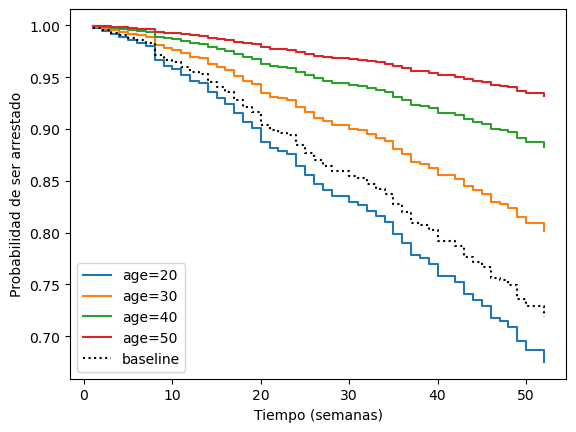

In [17]:
# Funcion de supervivencia
cph.plot_partial_effects_on_outcome(covariates = 'age', values = [20, 30, 40, 50])
plt.xlabel('Tiempo (semanas)')
plt.ylabel('Probabilidad de ser arrestado')
plt.show()